In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
%matplotlib inline

In [21]:
df=pd.read_csv('../Downloads/Train.csv')
val=df.values
x=val[:,0:-1]
y=val[:,-1]
print(x[0:3,:])

[[ 0.29341624 -0.94559871 -0.42110515  0.40681602  0.52566183]
 [-0.83608408 -0.18922804 -0.77640262 -1.05383124  0.59799685]
 [ 0.23642511  0.13283602 -0.14772298  0.69985396 -0.18736416]]


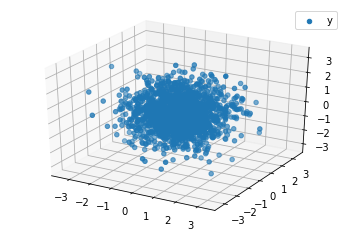

In [22]:
fig = plt.figure() 
ax = fig.gca(projection ='3d') 
ax.scatter(x[:, 0], x[:, 1], x[:, 2],y, label ='y') 
ax.legend() 
plt.show() 

In [38]:
#defining thpothesis
def hypothesis(x,w,b):
    return np.dot(w,(x.T))+b    


In [48]:
#error calculation
def error(x,y,w,b):
    e=0.0
    m=x.shape[0]
    for i in range(m):
        hx=hypothesis(x[i],w,b)
        e=e+(hx-y[i])**2
    return e    

In [49]:
#gredient
def gredient(x,y,w,b):
    grad=np.array([0.0,0.0,0.0,0.0,0.0,0.0])
    m=x.shape[0]
    for i in range(m):
        hx=hypothesis(x[i],w,b)
        grad[0]+=(hx-y[i])
        grad[1]+=(hx-y[i])*x[i][0]
        grad[2]+=(hx-y[i])*x[i][1]
        grad[3]+=(hx-y[i])*x[i][2]
        grad[4]+=(hx-y[i])*x[i][3]
        grad[5]+=(hx-y[i])*x[i][4]
    return grad    

In [50]:
#Gredient Descent
def GradientDescent(x,y,learning_rate=.0003):
    w=np.array([0.5,0.7,0.5,0.3,0.3])
    b=0.0
    max_itr=100
    err_arr=[]
    theta_arr=[]
    for i in range(max_itr):
        g=gredient(x,y,w,b)
        e=error(x,y,w,b)
        err_arr.append(e)
        theta_arr.append((w[0],w[1],w[2],w[3],w[4]))
        b=b-learning_rate*(g[0])
        w[0]=w[0]-learning_rate*(g[1])
        w[1]=w[1]-learning_rate*(g[2])
        w[2]=w[2]-learning_rate*(g[3])
        w[3]=w[3]-learning_rate*(g[4])
        w[4]=w[4]-learning_rate*(g[5])
        
    return  w,b,err_arr,theta_arr

In [54]:
cofficient,intercept, error_list,theta_list = GradientDescent(x,y)  

In [55]:
print(cofficient)
print(intercept)

[29.68187118 92.66247759  8.28062089 44.76773522  2.51916121]
4.9909667355749585


In [58]:
df_test=pd.read_csv("../Downloads/Test.csv")
t=df_test.values
output=[]
m=t.shape[0]
for i in range(m):
    output.append(np.dot(cofficient,(t[i].T))+intercept )
df_test.to_csv('AirPollution.csv')    